In [41]:
import pandas as pd #Let's import the libraries that we'll use
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error

In [42]:
inflation = pd.read_csv(r"C:\Users\jeeva\Downloads\food_price_index.csv")
inflation.head()

o_food_price_index  h_food_price_index  l_food_price_index  \
0                0.61                0.62                0.60   
1                0.62                0.62                0.61   
2                0.62                0.63                0.61   
3                0.62                0.65                0.62   
4                0.66                0.69                0.65   

   c_food_price_index  inflation_food_price_index      country ISO3  \
0                0.61                         NaN  Afghanistan  AFG   
1                0.62                         NaN  Afghanistan  AFG   
2                0.62                         NaN  Afghanistan  AFG   
3                0.65                         NaN  Afghanistan  AFG   
4                0.69                         NaN  Afghanistan  AFG   

         date  
0  01-01-2007  
1  01-02-2007  
2  01-03-2007  
3  01-04-2007  
4  01-05-2007

In [43]:
inflation

o_food_price_index  h_food_price_index  l_food_price_index  \
0                     0.61                0.62                0.60   
1                     0.62                0.62                0.61   
2                     0.62                0.63                0.61   
3                     0.62                0.65                0.62   
4                     0.66                0.69                0.65   
...                    ...                 ...                 ...   
280963                2.86                2.90                2.81   
280964                2.82                2.87                2.78   
280965                2.86                2.90                2.82   
280966                2.85                2.91                2.81   
280967                2.97                3.02                2.88   

        c_food_price_index  inflation_food_price_index      country ISO3  \
0                     0.61                         NaN  Afghanistan  AFG   
1                     0.62                         NaN  Afghanistan  AFG   
2                     0.62                         NaN  Afghanistan  AFG   
3                     0.65                         NaN  Afghanistan  AFG   
4                     0.69                         NaN  Afghanistan  AFG   
...                    ...                         ...          ...  ...   
280963                2.81                       -3.67  Yemen, Rep.  YEM   
280964                2.83                       -3.05  Yemen, Rep.  YEM   
280965                2.83                       -1.32  Yemen, Rep.  YEM   
280966                2.91                        4.76  Yemen, Rep.  YEM   
280967                2.88                        6.67  Yemen, Rep.  YEM   

              date  
0       01-01-2007  
1       01-02-2007  
2       01-03-2007  
3       01-04-2007  
4       01-05-2007  
...            ...  
280963  01-08-2023  
280964  01-09-2023  
280965  01-10-2023  
280966  01-11-2023  
280967  01-12-2023  

[280968 rows x 8 columns]

In [44]:
inflation.isnull().sum()

o_food_price_index             3726
h_food_price_index             3726
l_food_price_index             3726
c_food_price_index             3726
inflation_food_price_index    20934
country                           0
ISO3                              0
date                              0
dtype: int64

In [35]:
inflation.shape

(280968, 8)

In [36]:
inflation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280968 entries, 0 to 280967
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   o_food_price_index          277242 non-null  float64
 1   h_food_price_index          277242 non-null  float64
 2   l_food_price_index          277242 non-null  float64
 3   c_food_price_index          277242 non-null  float64
 4   inflation_food_price_index  260034 non-null  float64
 5   country                     280968 non-null  object 
 6   ISO3                        280968 non-null  object 
 7   date                        280968 non-null  object 
dtypes: float64(5), object(3)
memory usage: 17.1+ MB


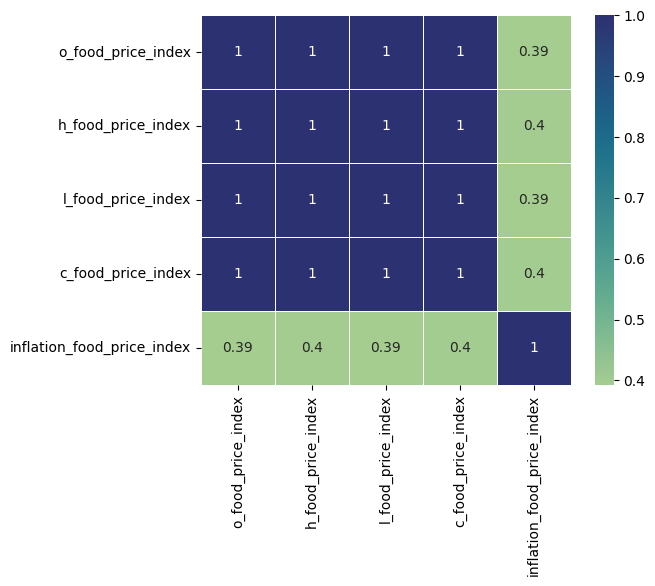

In [45]:
inflation_numeric = inflation.drop(['country', 'ISO3', 'date'], axis=1)

sns.heatmap(inflation_numeric.corr(), cmap='crest', linewidth=.5, annot=True, square=True)
plt.show()

In [ ]:
#ANALYZING, VISUALIZATION AND DATA PREPROCESSING

In [46]:
inflation.isnull().sum()

o_food_price_index             3726
h_food_price_index             3726
l_food_price_index             3726
c_food_price_index             3726
inflation_food_price_index    20934
country                           0
ISO3                              0
date                              0
dtype: int64

In [48]:
mode_open = inflation['o_food_price_index'].mode().iloc[0]
inflation['o_food_price_index'] = inflation['o_food_price_index'].fillna(value=mode_open)

mode_close = inflation['c_food_price_index'].mode().iloc[0]
inflation['c_food_price_index'] = inflation['c_food_price_index'].fillna(value=mode_close)

mode_high = inflation['h_food_price_index'].mode().iloc[0]
inflation['h_food_price_index'] = inflation['h_food_price_index'].fillna(value=mode_high)

mode_low = inflation['l_food_price_index'].mode().iloc[0]
inflation['l_food_price_index'] = inflation['l_food_price_index'].fillna(value=mode_low)

In [49]:
inflation.isnull().sum()

o_food_price_index                0
h_food_price_index                0
l_food_price_index                0
c_food_price_index                0
inflation_food_price_index    20934
country                           0
ISO3                              0
date                              0
dtype: int64

In [50]:
inflation['date'] = pd.to_datetime(inflation['date'])

In [51]:
inflation.set_index('date', inplace=True)

In [52]:
inflation = inflation.dropna(axis=0)

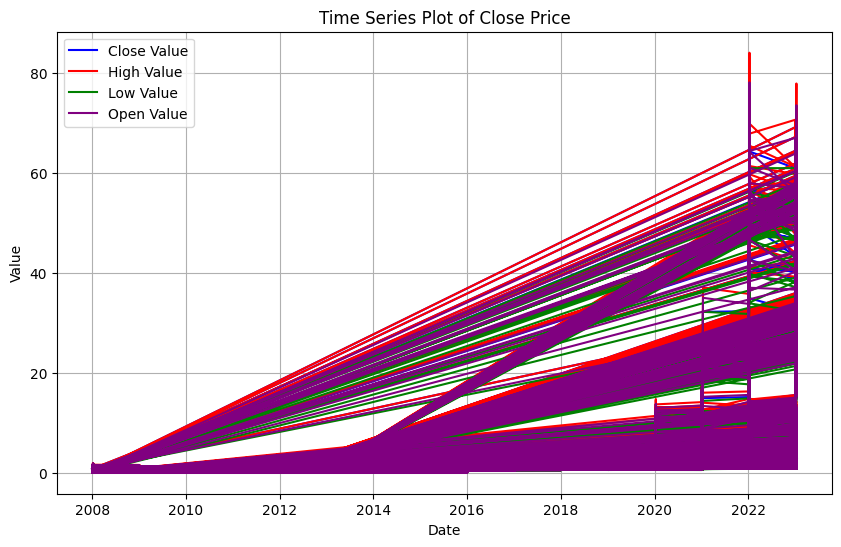

In [54]:
plt.figure(figsize=(10, 6))
plt.plot(inflation['c_food_price_index'], label='Close Value', color='blue')
plt.plot(inflation['h_food_price_index'], label='High Value', color='red')
plt.plot(inflation['l_food_price_index'], label='Low Value', color='green')
plt.plot(inflation['o_food_price_index'], label='Open Value', color='purple')
plt.title('Time Series Plot of Close Price')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [55]:
inflation.describe()

o_food_price_index  h_food_price_index  l_food_price_index  \
count       260034.000000       260034.000000       260034.000000   
mean             1.312325            1.364016            1.263454   
std              2.986326            3.142644            2.833219   
min              0.010000            0.010000            0.010000   
25%              0.750000            0.780000            0.730000   
50%              0.960000            0.990000            0.930000   
75%              1.130000            1.170000            1.090000   
max             78.150000           84.080000           68.680000   

       c_food_price_index  inflation_food_price_index  
count       260034.000000               260034.000000  
mean             1.314355                   12.980804  
std              2.972311                   32.547245  
min              0.010000                  -79.080000  
25%              0.750000                   -1.770000  
50%              0.960000                    5.450000  
75%              1.130000                   18.110000  
max             71.310000                  624.240000

In [56]:
unique_countries = inflation['country'].unique()

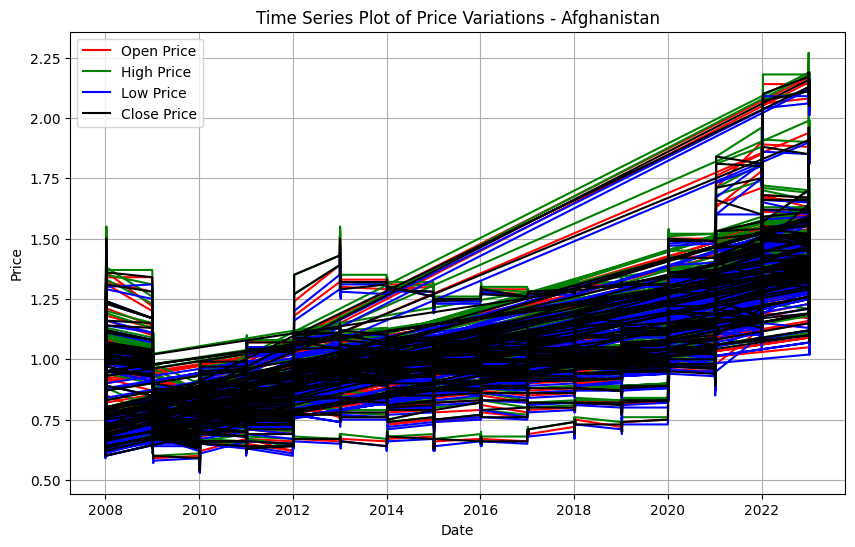

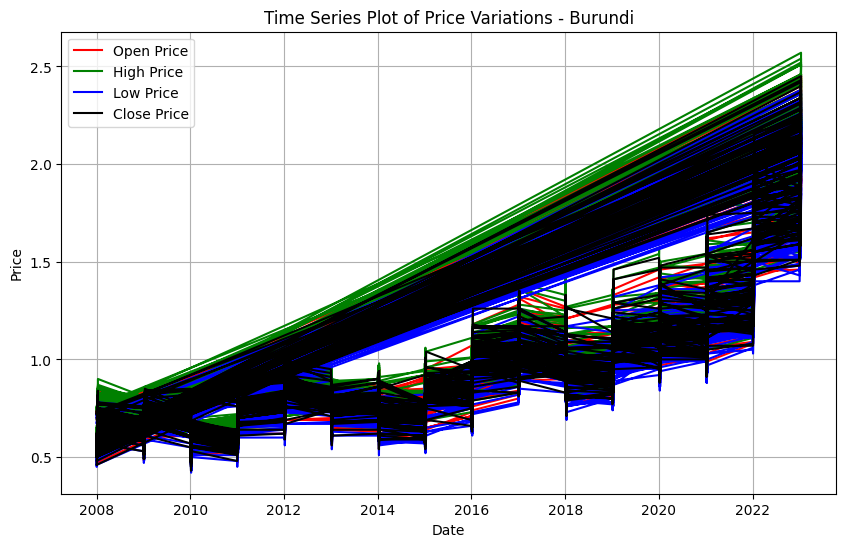

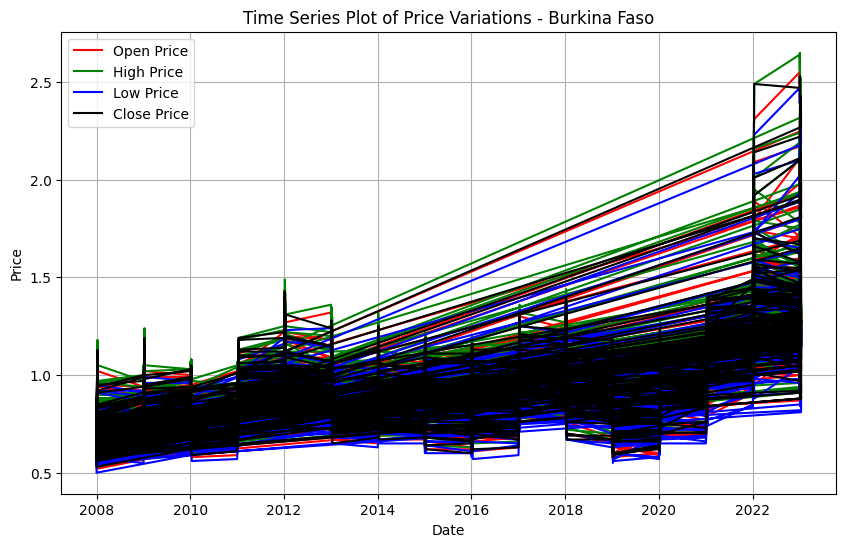

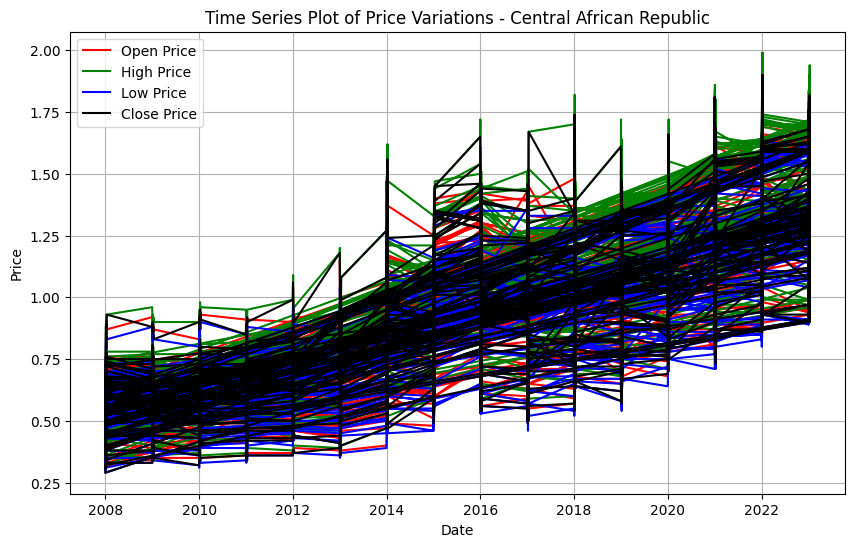

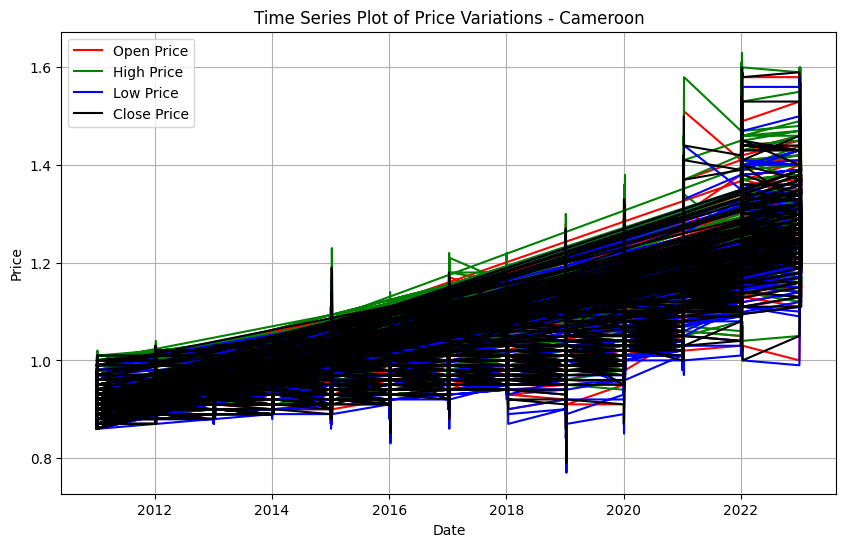

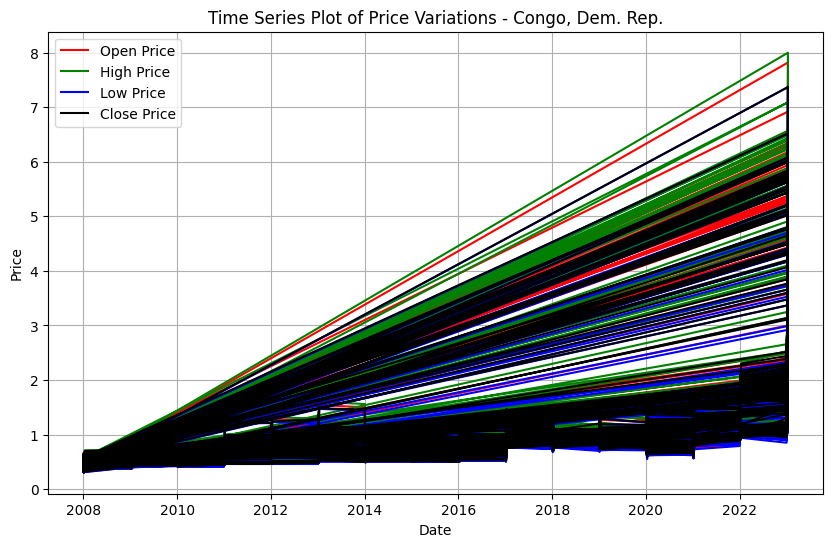

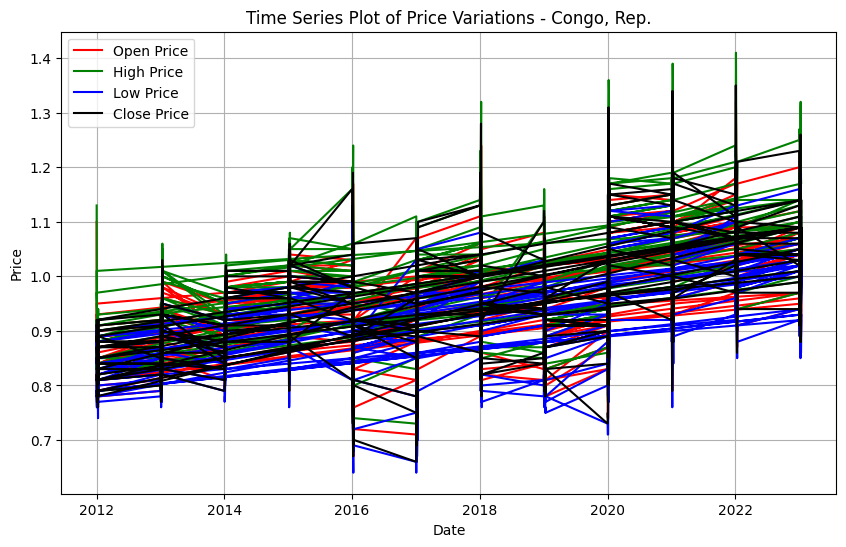

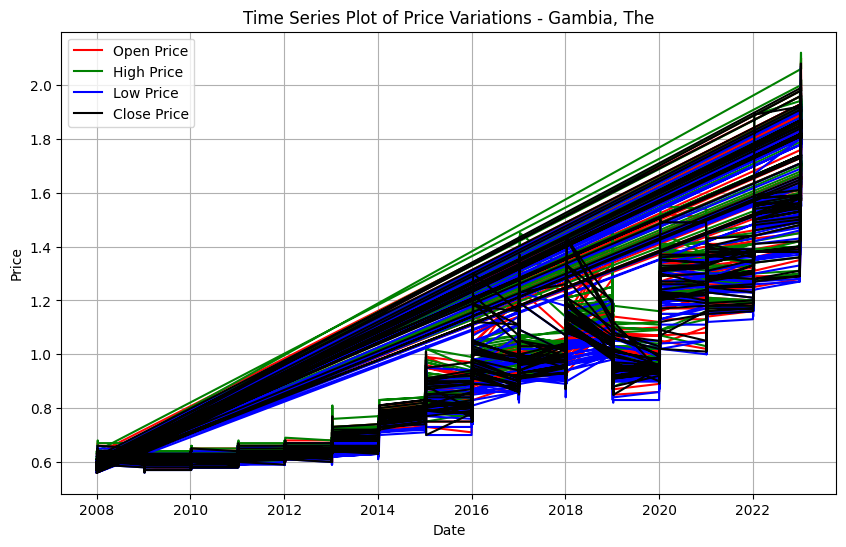

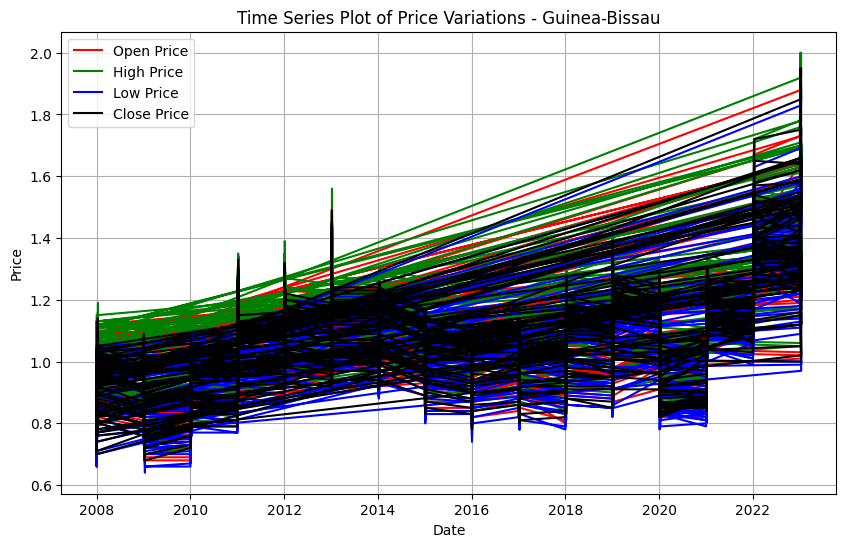

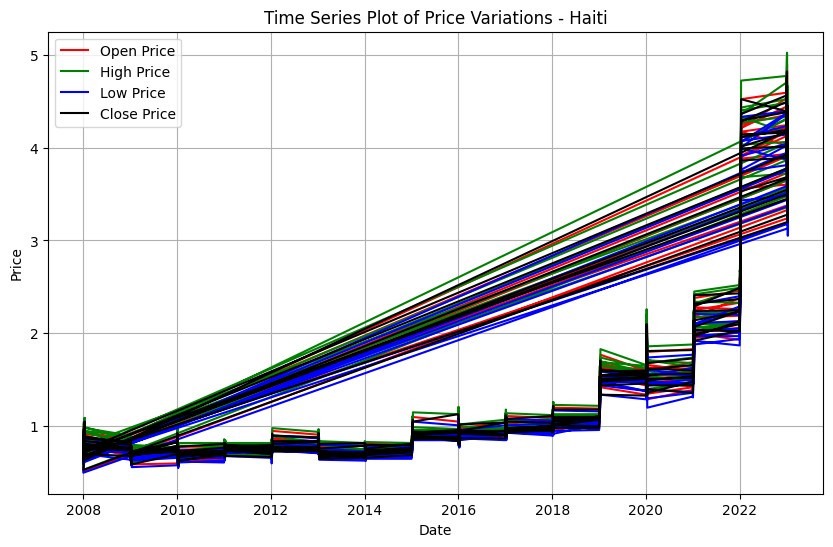

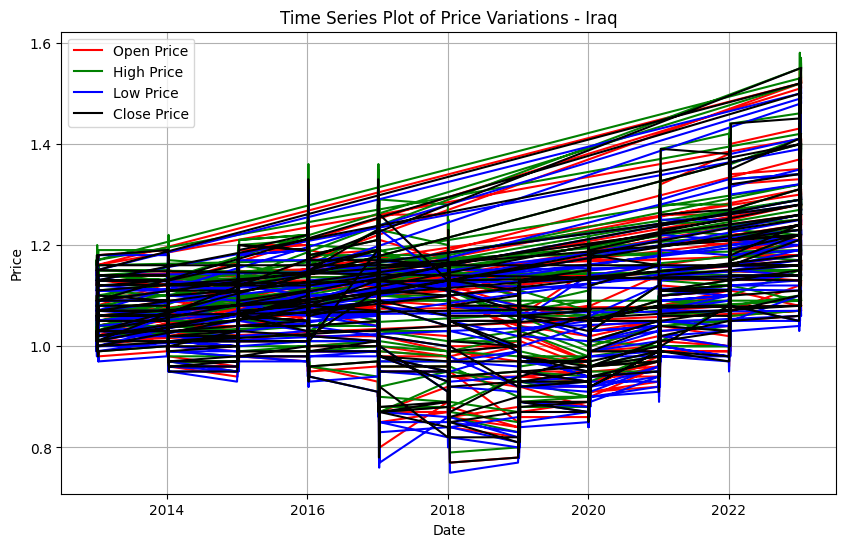

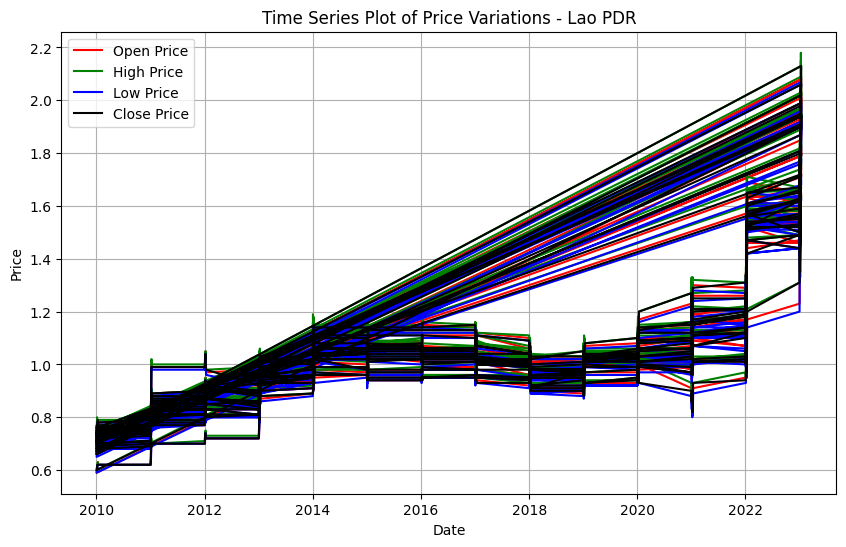

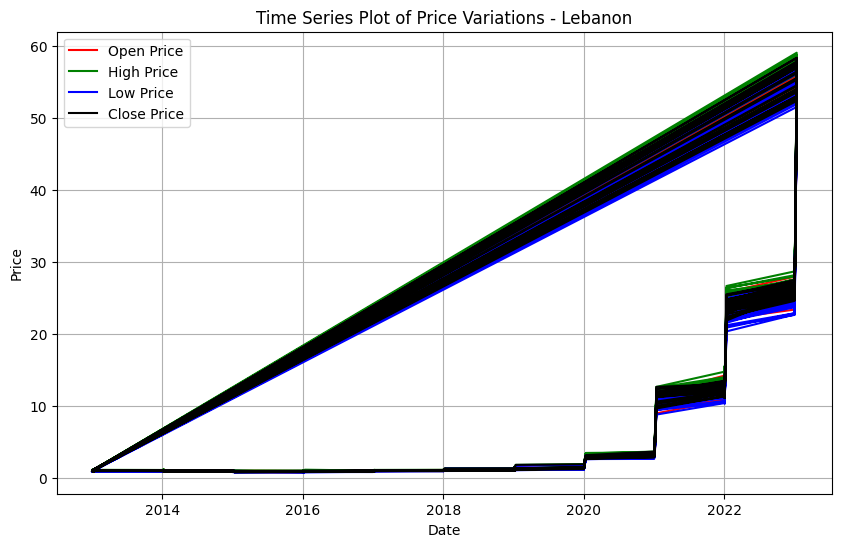

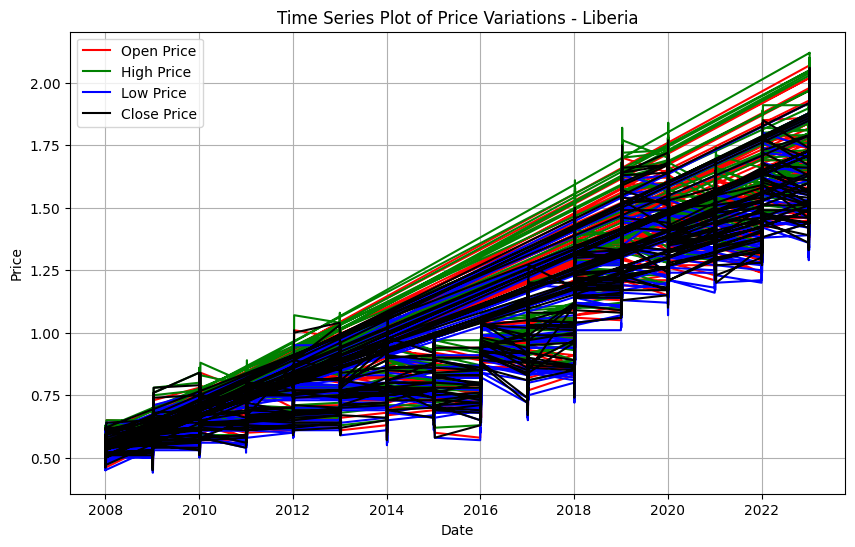

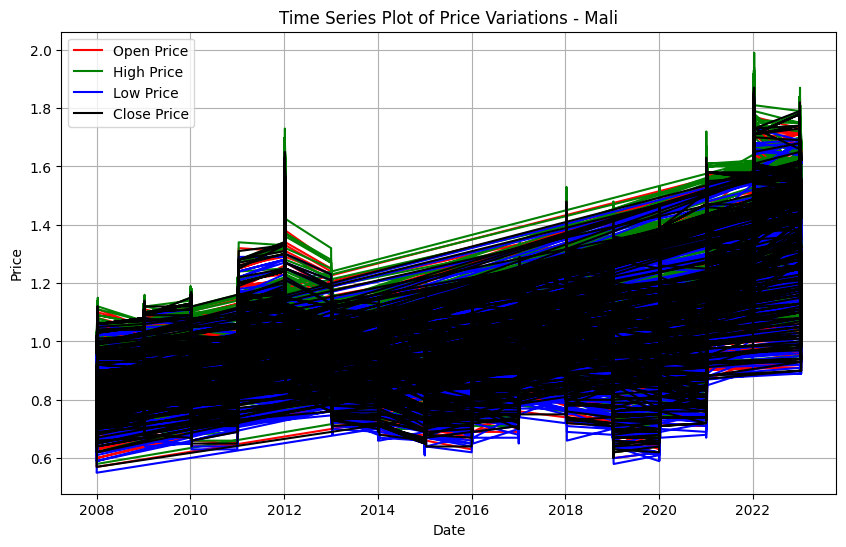

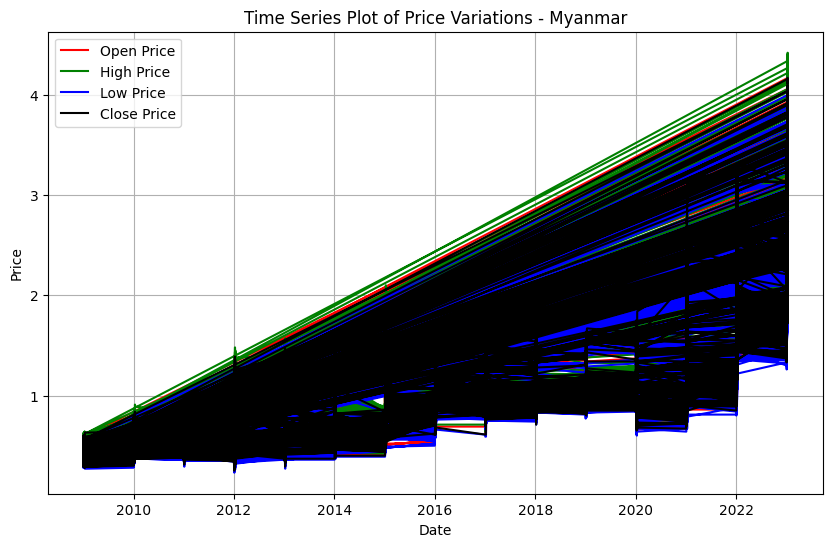

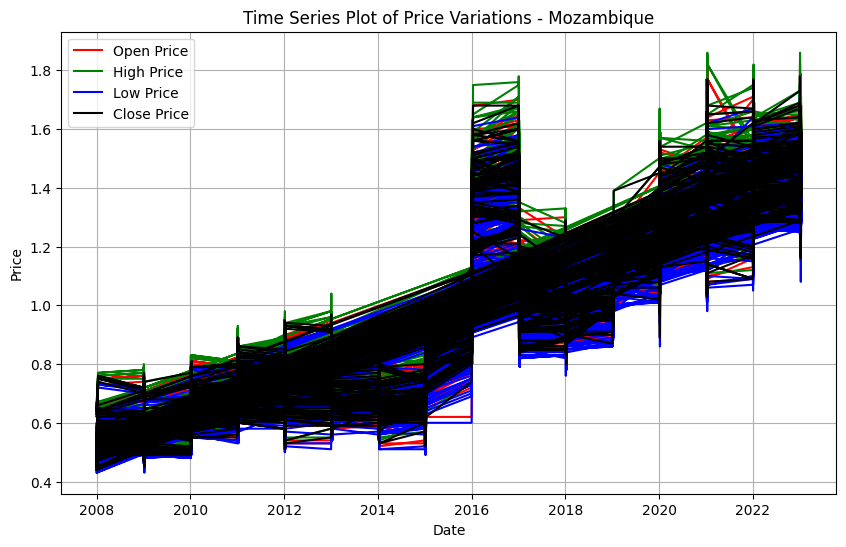

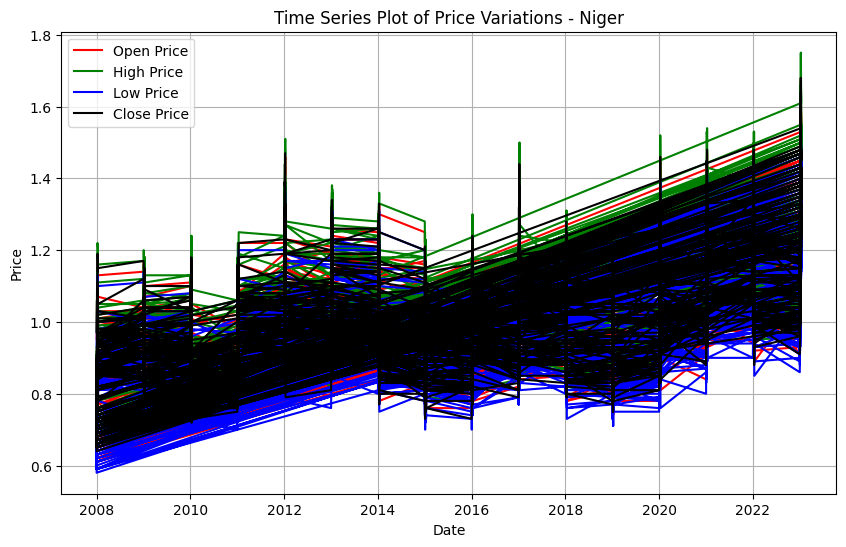

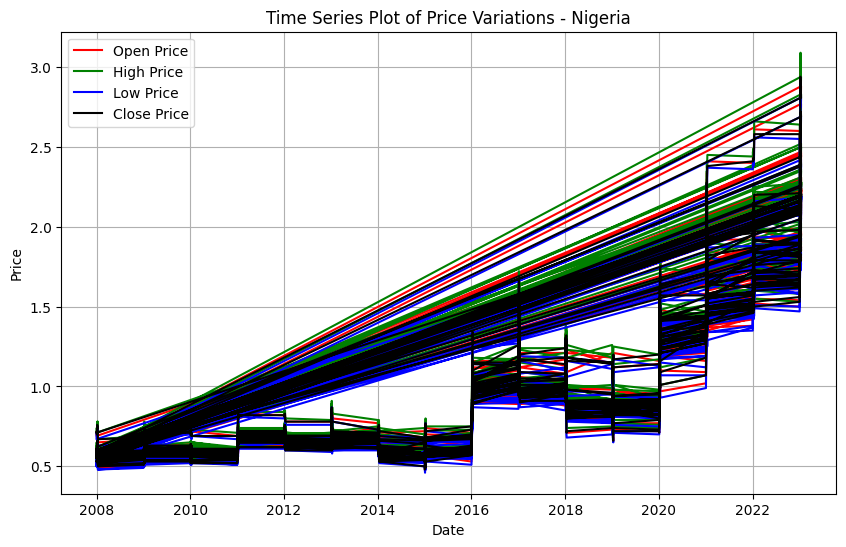

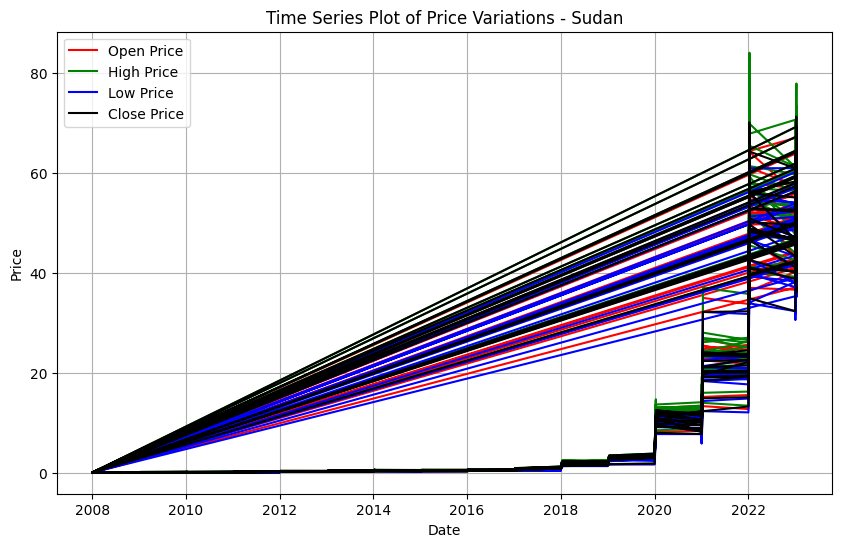

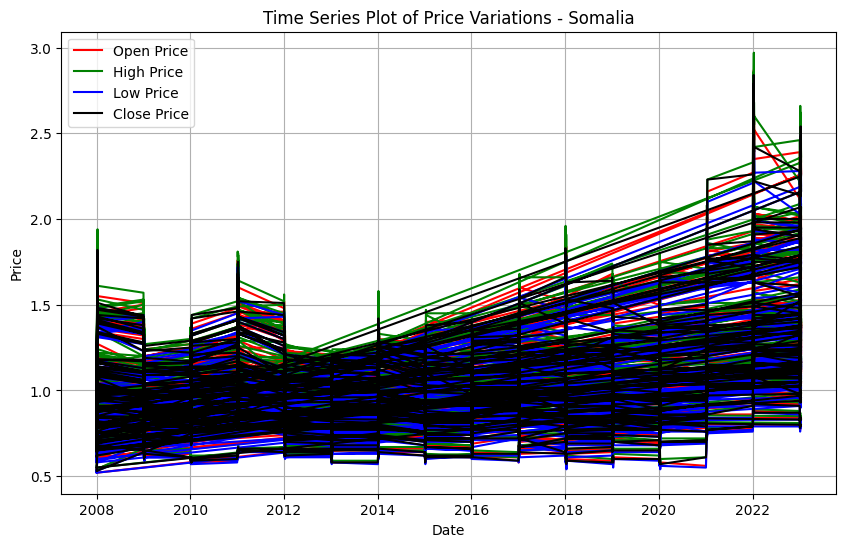

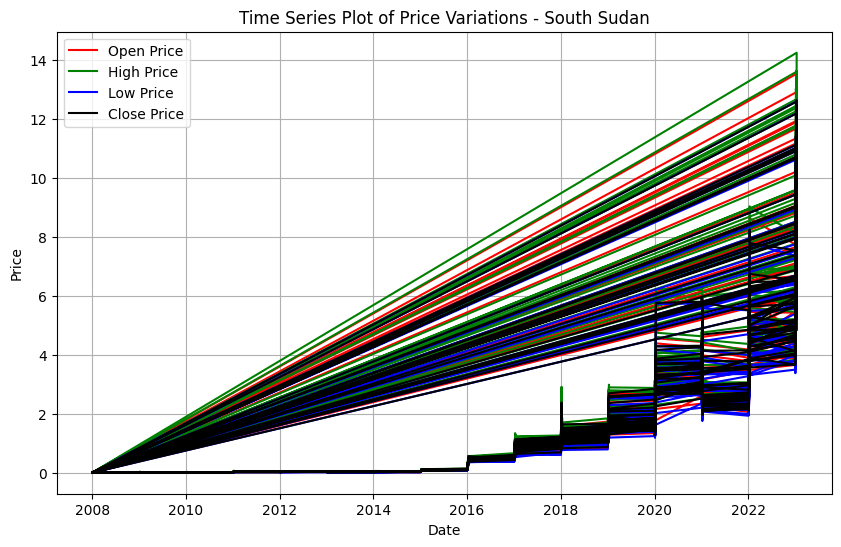

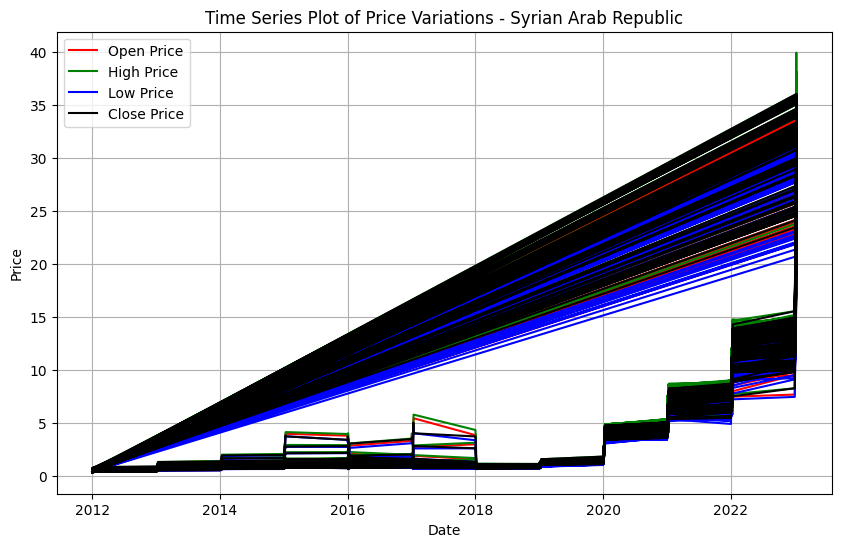

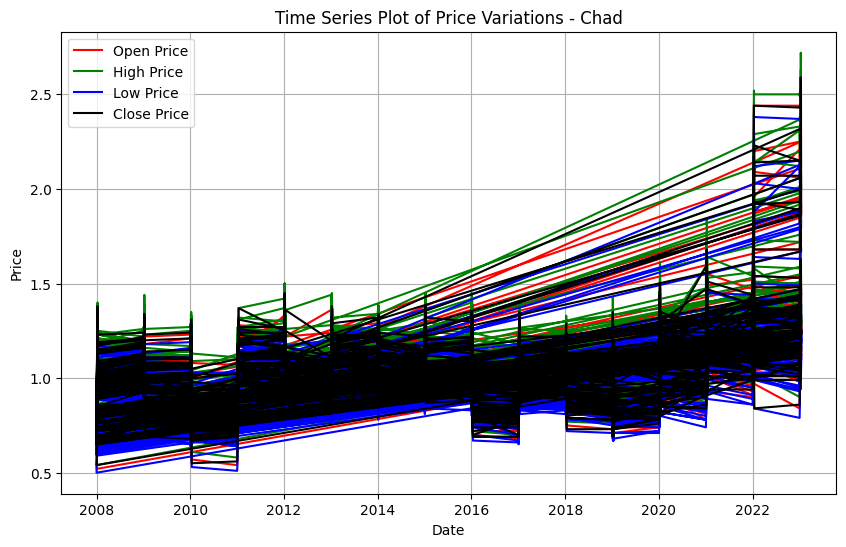

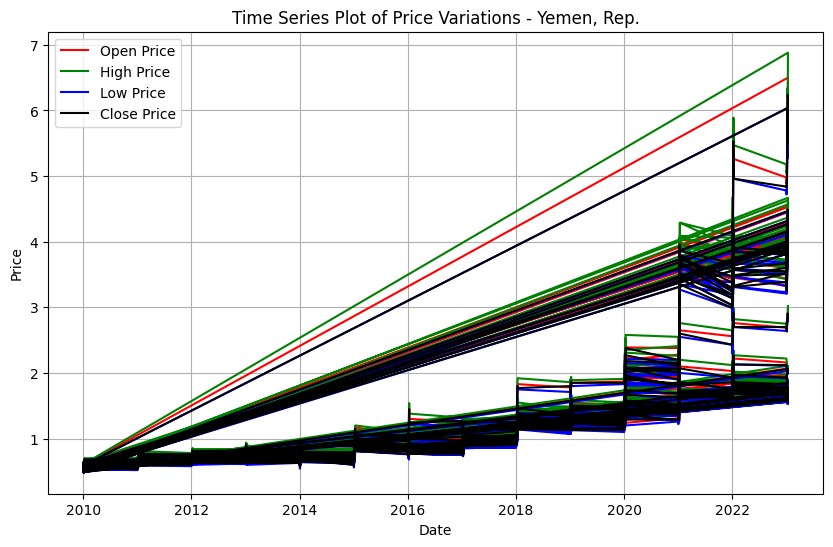

In [57]:
for country in unique_countries:
    country_data = inflation[inflation['country'] == country]
    
    plt.figure(figsize=(10, 6))
    plt.plot(country_data['o_food_price_index'], label='Open Price', color='red')
    plt.plot(country_data['h_food_price_index'], label='High Price', color='green')
    plt.plot(country_data['l_food_price_index'], label='Low Price', color='blue')
    plt.plot(country_data['c_food_price_index'], label='Close Price', color='black')
    
    plt.title(f'Time Series Plot of Price Variations - {country}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()

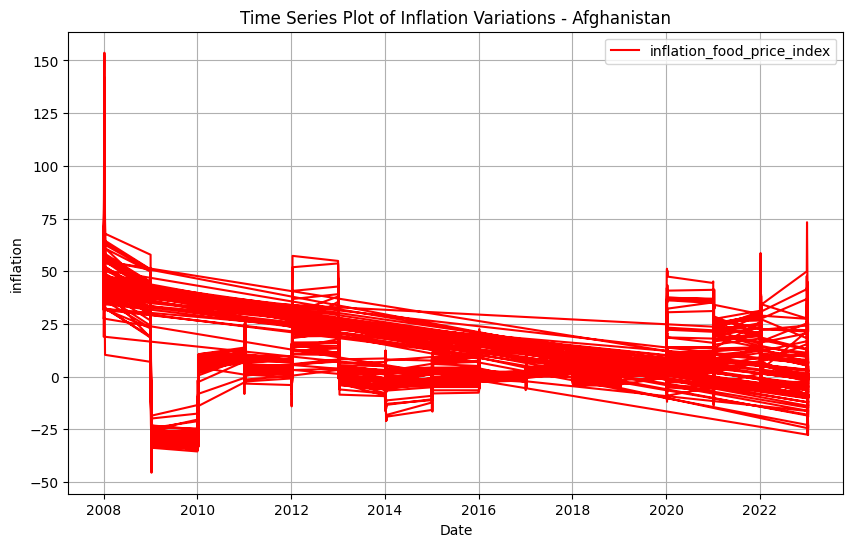

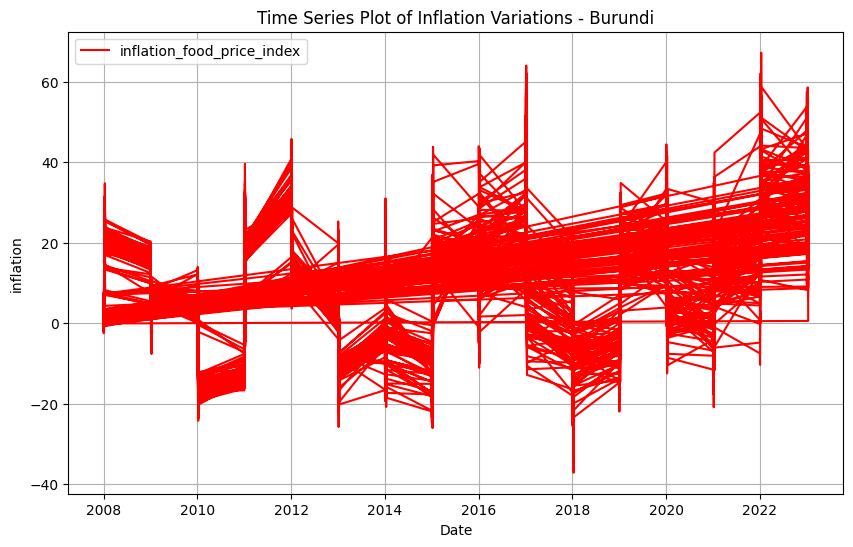

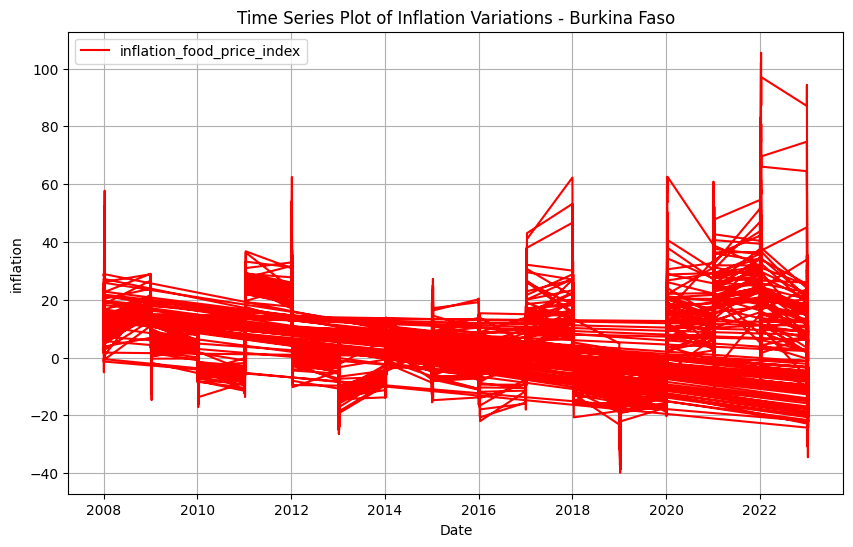

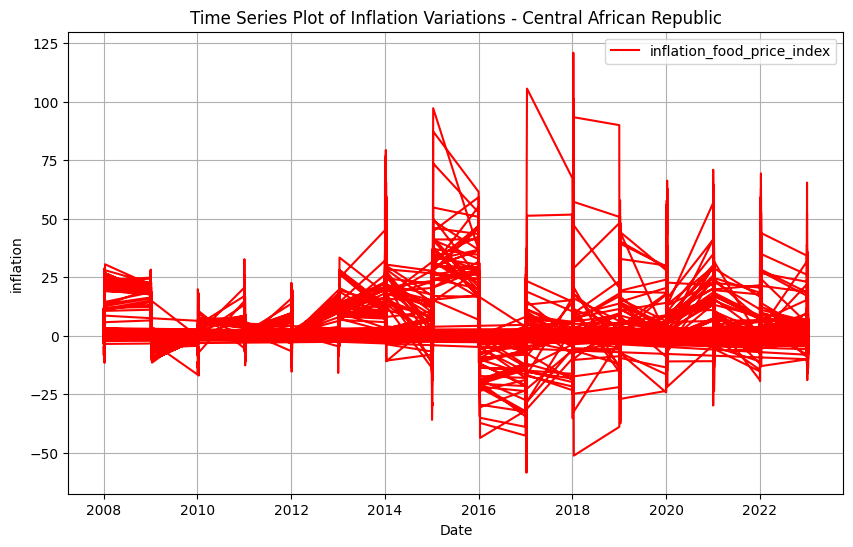

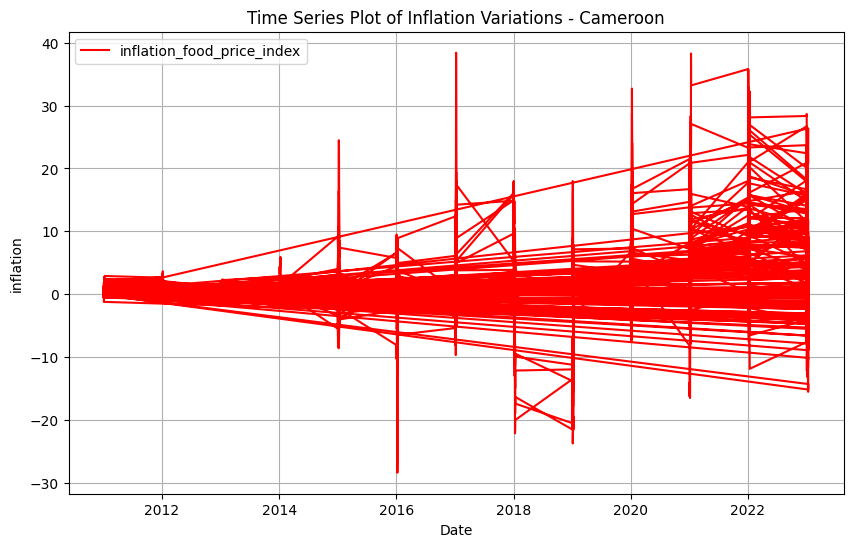

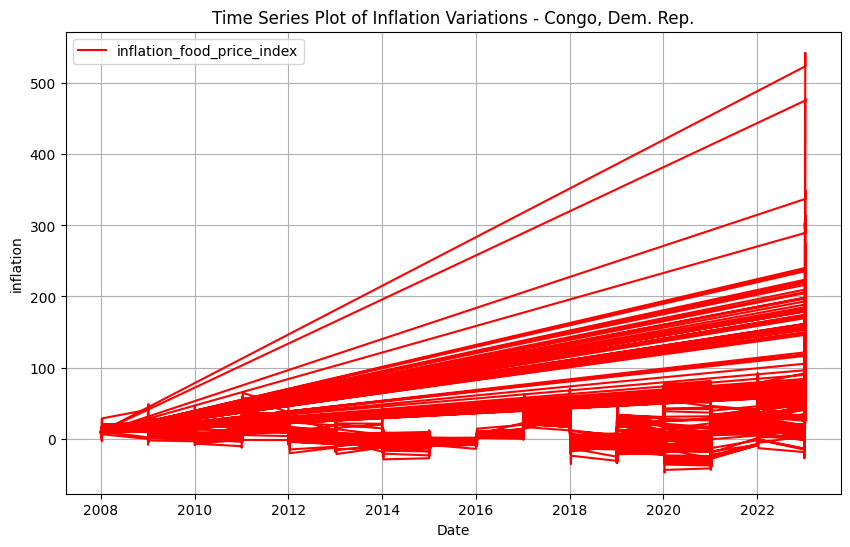

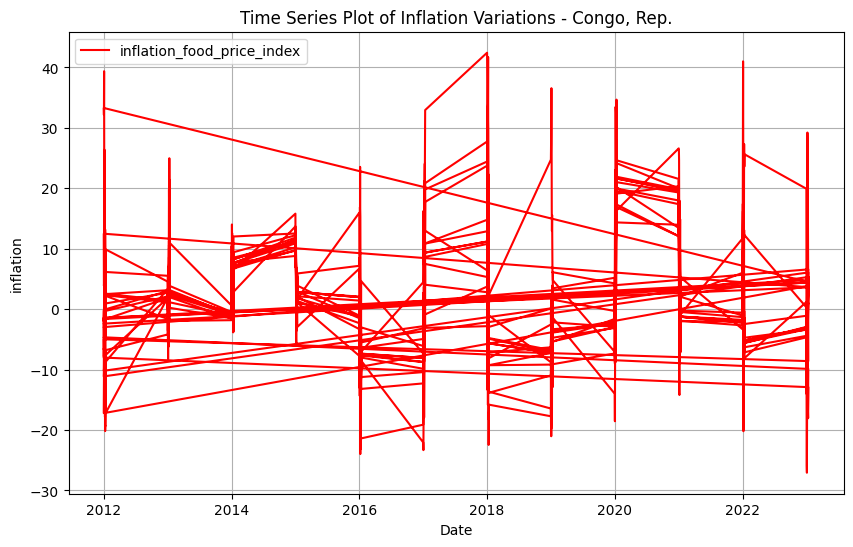

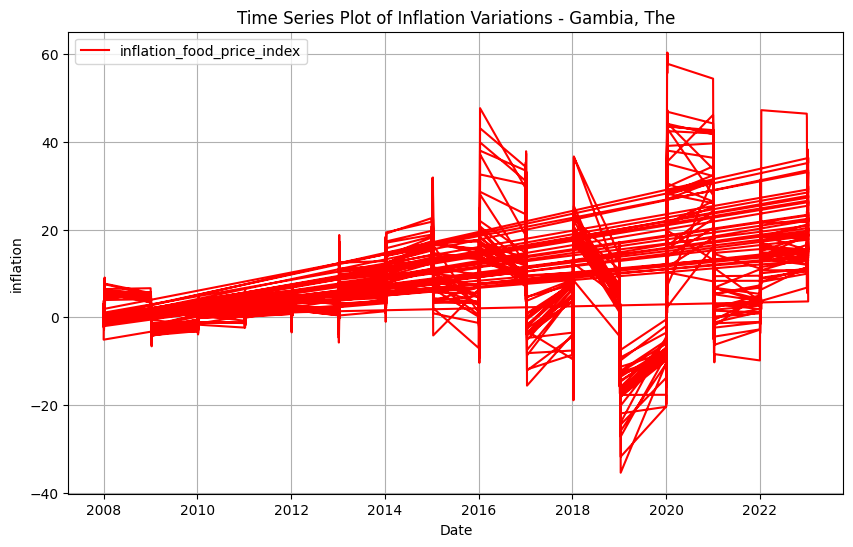

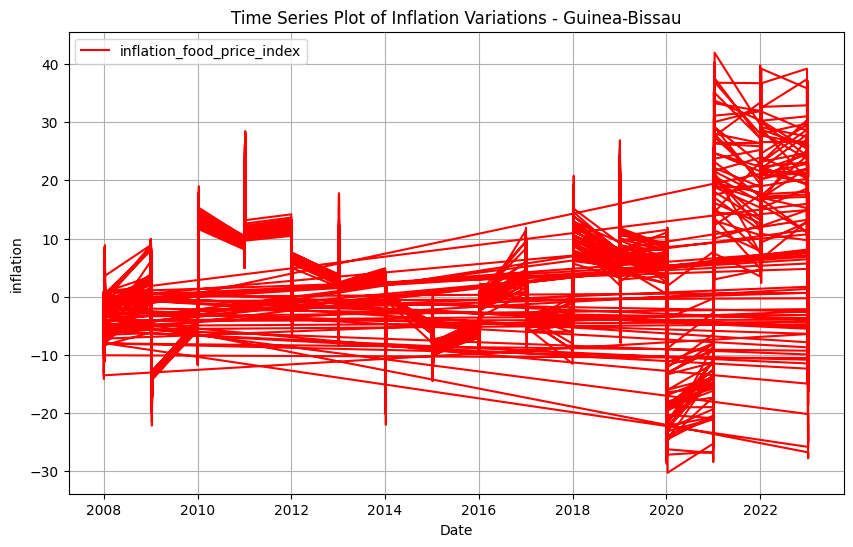

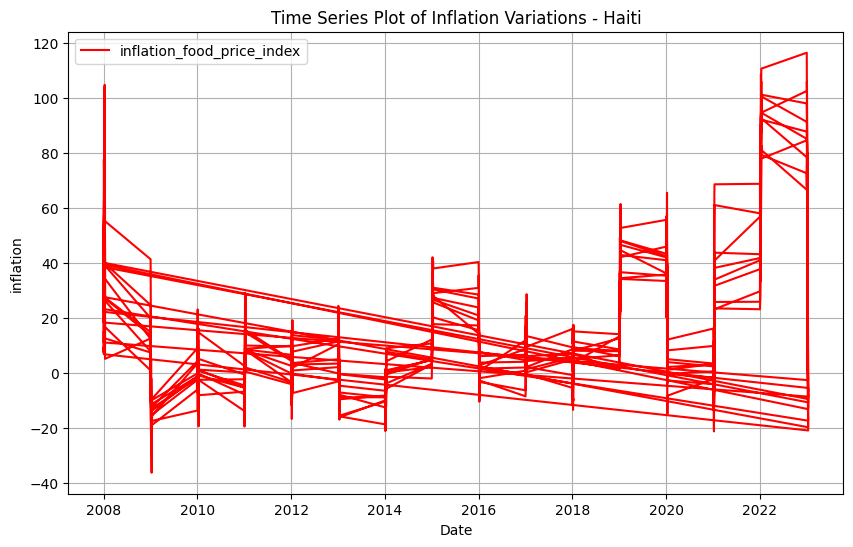

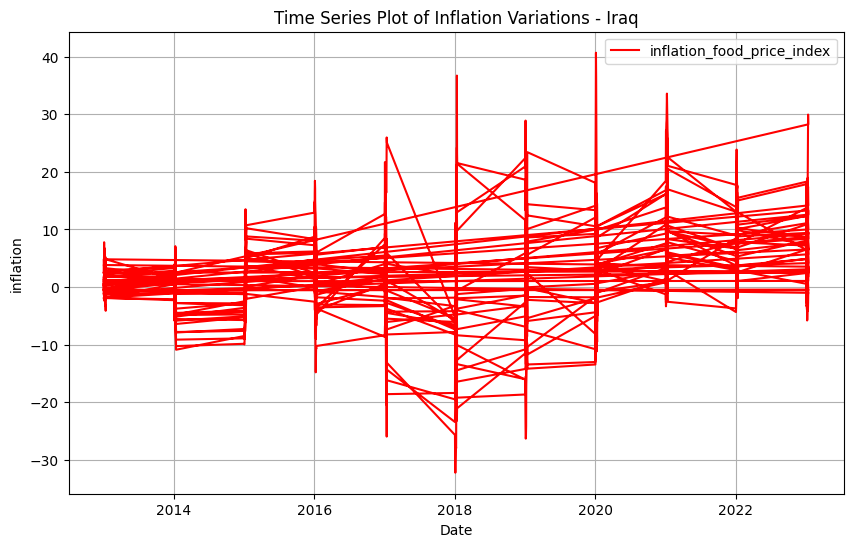

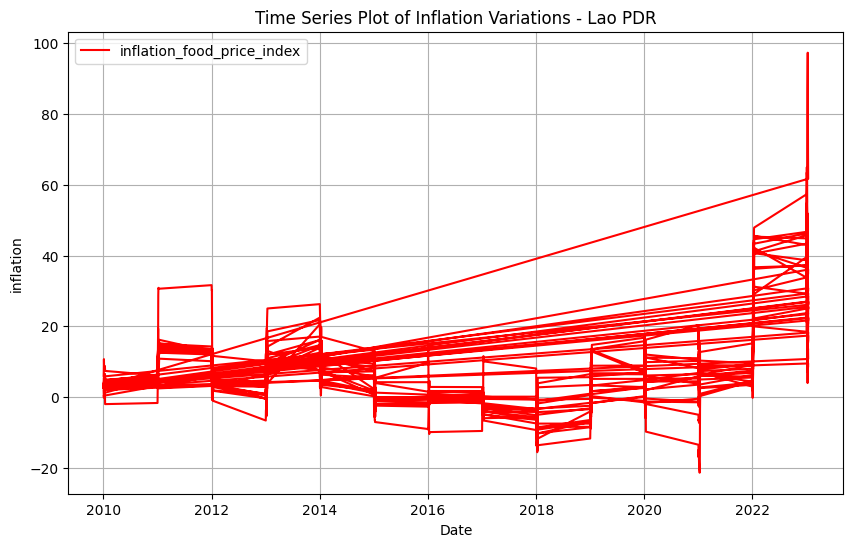

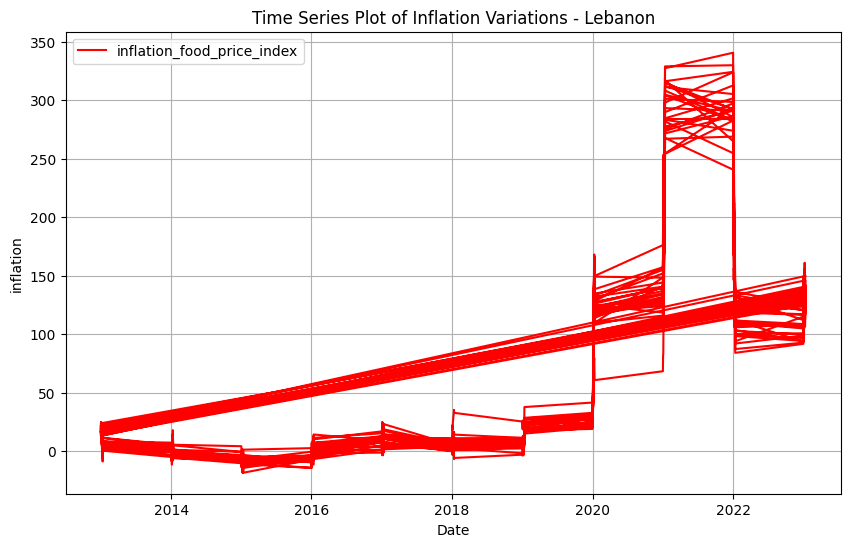

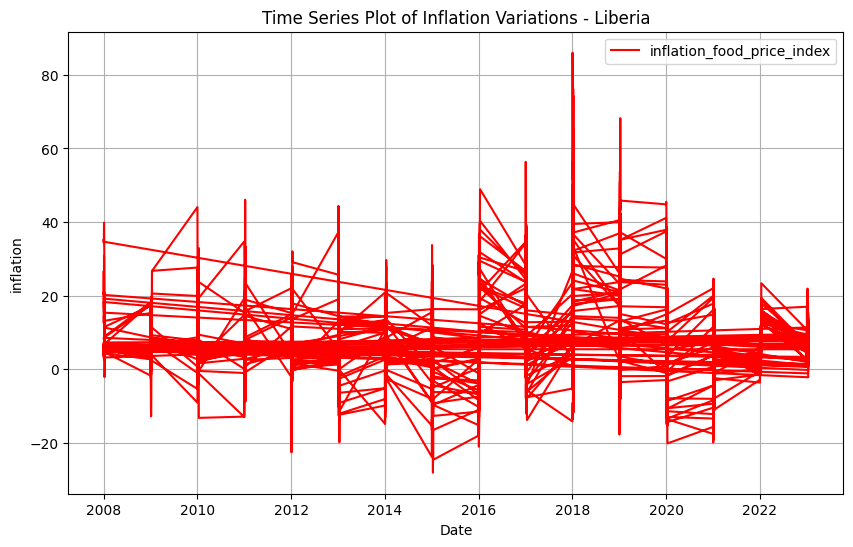

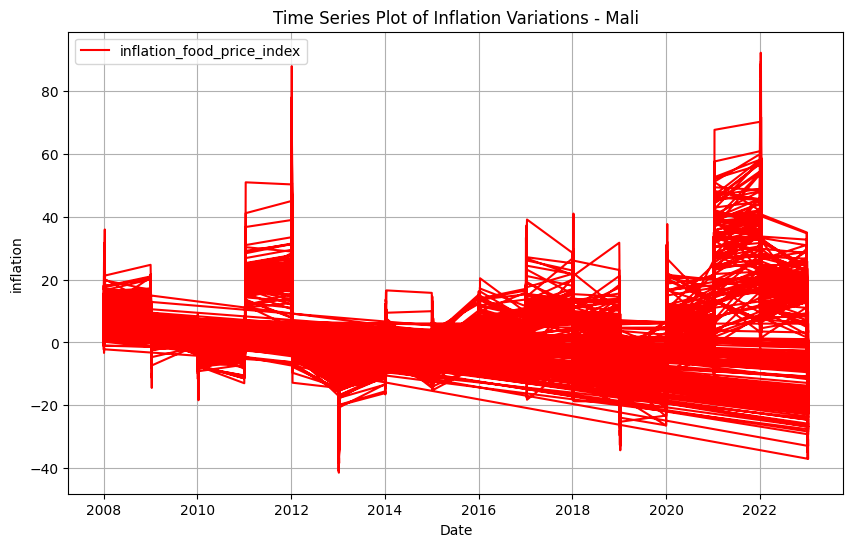

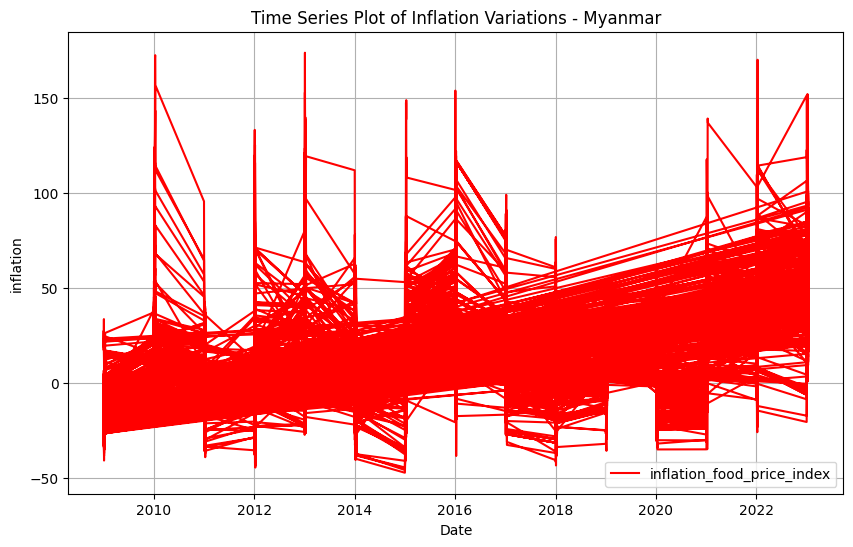

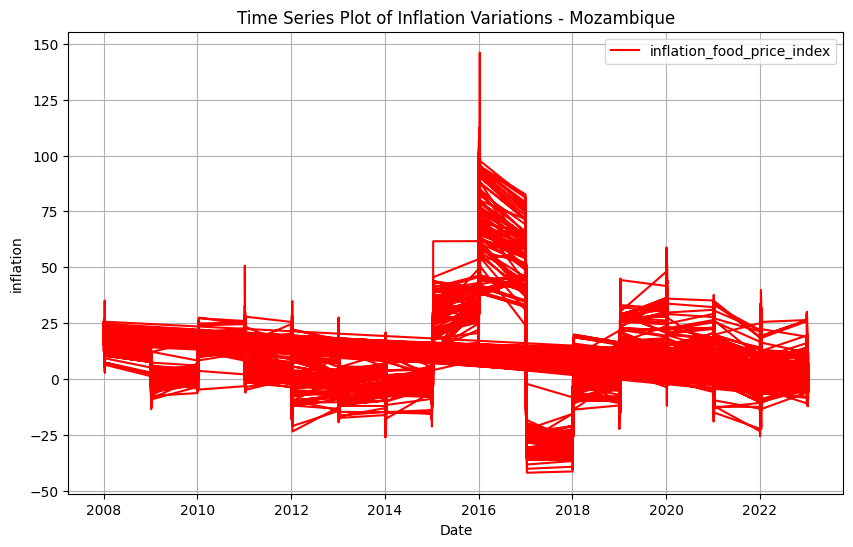

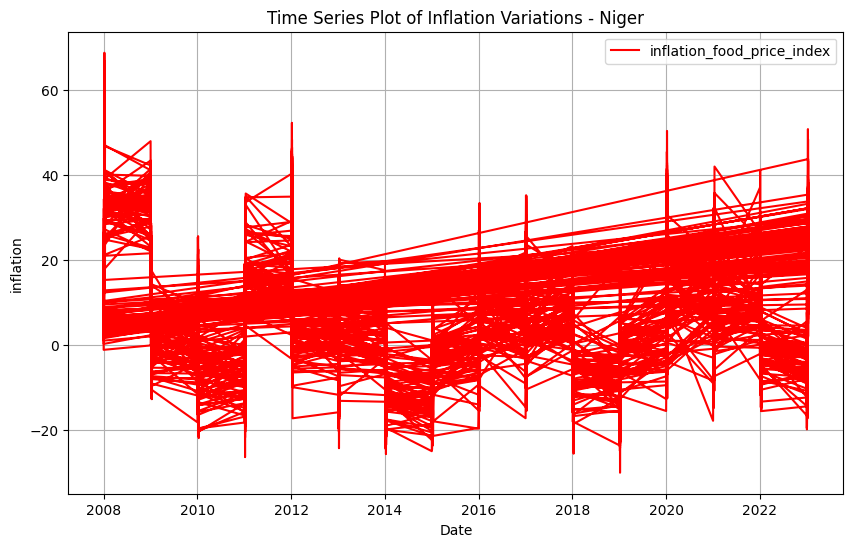

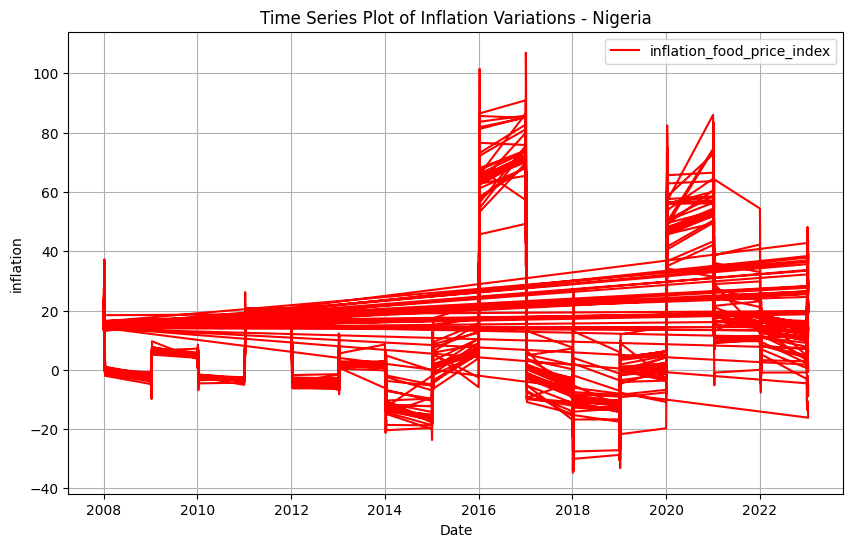

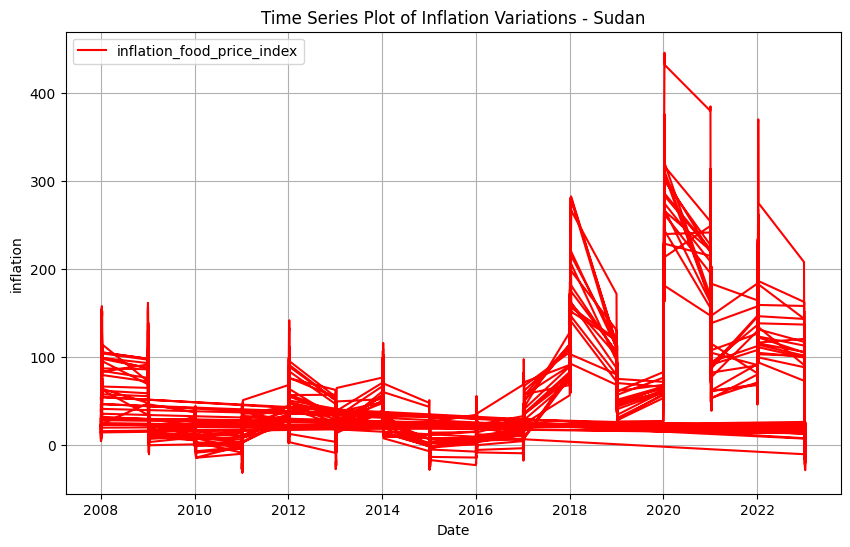

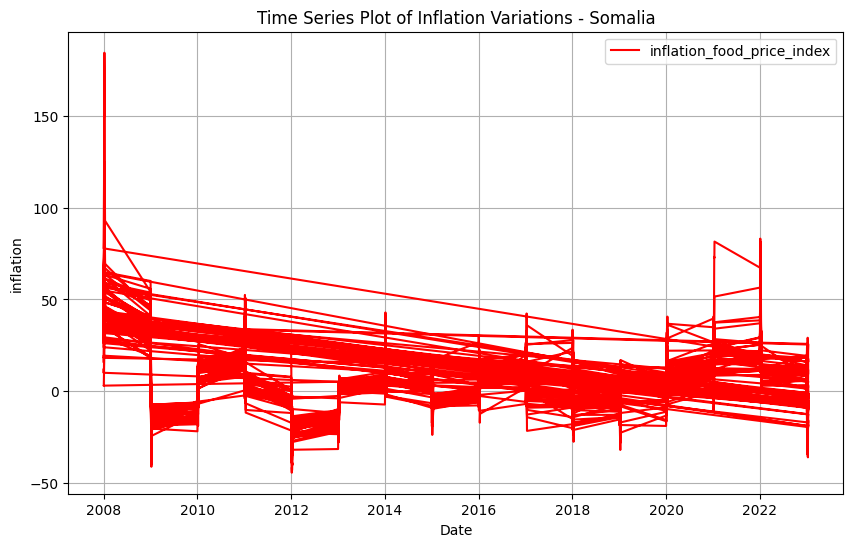

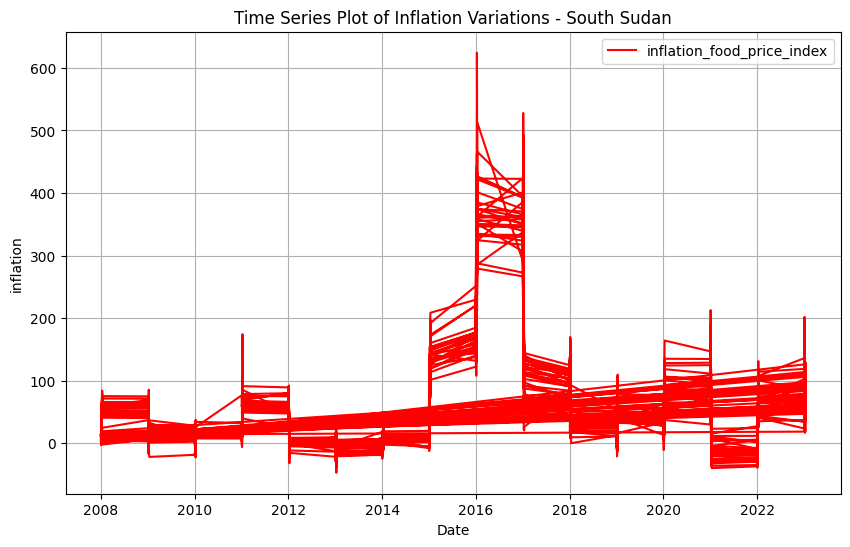

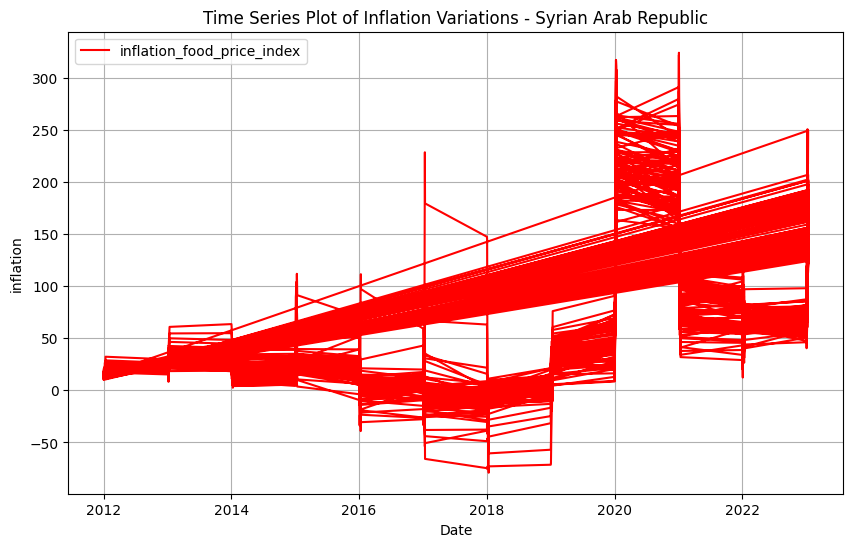

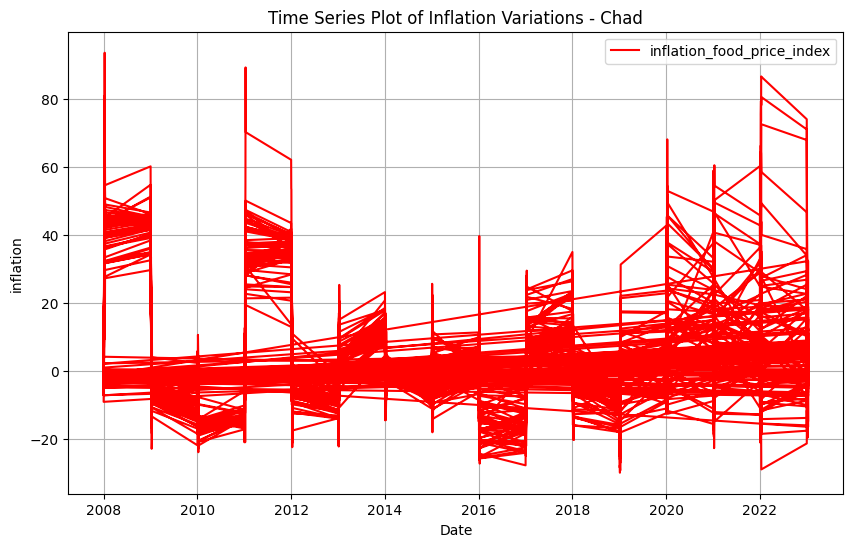

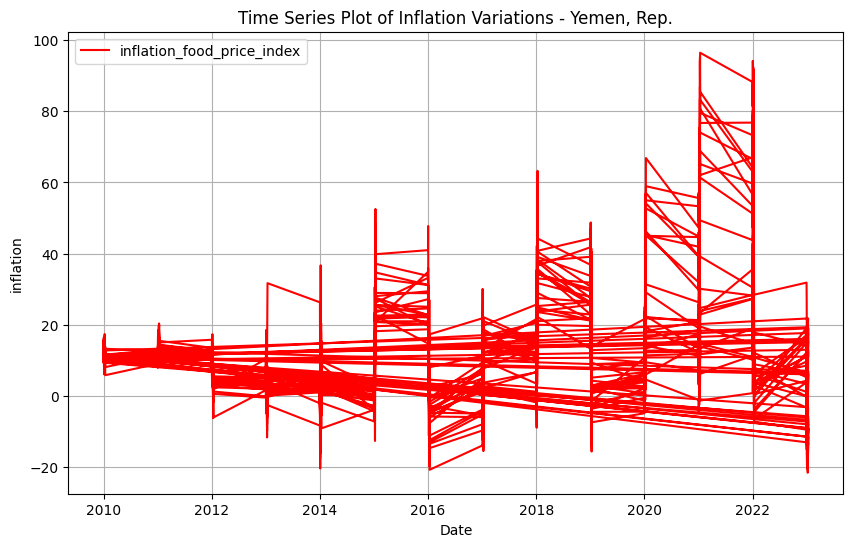

In [63]:
for country in unique_countries:
    country_data = inflation[inflation['country'] == country]
    plt.figure(figsize=(10,6))
    plt.plot(country_data['inflation_food_price_index'], label='inflation_food_price_index', color='red')
    
    plt.title(f'Time Series Plot of Inflation Variations - {country}')
    plt.xlabel('Date')
    plt.ylabel('inflation')
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
#STATIONARITY TEST

In [61]:
def adf_test(series):
    result = adfuller(series)
    return result[1]

In [64]:
for country in unique_countries:
    country_data = inflation[inflation['country'] == country]
    p_value = adf_test(country_data['inflation_food_price_index'])
    
    print(f"Country: {country}, p-value: {p_value:.4f}")

Country: Afghanistan, p-value: 0.0000
Country: Burundi, p-value: 0.0000
Country: Burkina Faso, p-value: 0.0000
Country: Central African Republic, p-value: 0.0000
Country: Cameroon, p-value: 0.0000
Country: Congo, Dem. Rep., p-value: 0.0000
Country: Congo, Rep., p-value: 0.0000
Country: Gambia, The, p-value: 0.0000
Country: Guinea-Bissau, p-value: 0.0000
Country: Haiti, p-value: 0.0000
Country: Iraq, p-value: 0.0000
Country: Lao PDR, p-value: 0.0000
Country: Lebanon, p-value: 0.0000
Country: Liberia, p-value: 0.0000
Country: Mali, p-value: 0.0000
Country: Myanmar, p-value: 0.0000
Country: Mozambique, p-value: 0.0000
Country: Niger, p-value: 0.0000
Country: Nigeria, p-value: 0.0000
Country: Sudan, p-value: 0.0000
Country: Somalia, p-value: 0.0000
Country: South Sudan, p-value: 0.0000
Country: Syrian Arab Republic, p-value: 0.0000
Country: Chad, p-value: 0.0000
Country: Yemen, Rep., p-value: 0.0000


In [68]:
country_to_train = 'Myanmar'
country_data = inflation[inflation['country'] == country_to_train]['inflation_food_price_index']
country_data

date
2009-01-01   -25.47
2009-01-02   -23.54
2009-01-03   -19.03
2009-01-04   -23.85
2009-01-05   -22.25
              ...  
2023-01-08    65.66
2023-01-09    55.20
2023-01-10    47.68
2023-01-11    44.19
2023-01-12    46.21
Name: inflation_food_price_index, Length: 41580, dtype: float64

<Figure size 1200x600 with 0 Axes>

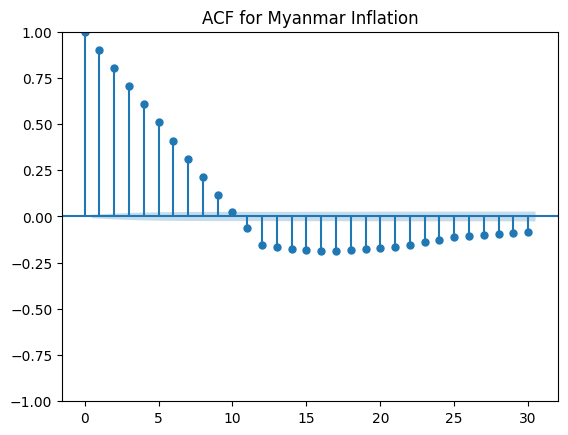

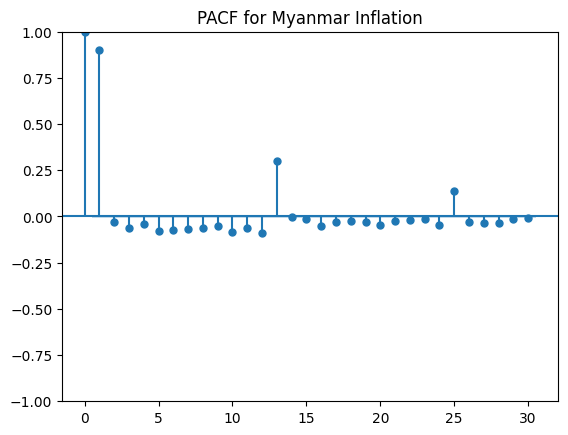

In [69]:
plt.figure(figsize=(12, 6))
plot_acf(country_data, lags=30, title=f'ACF for {country_to_train} Inflation')
plot_pacf(country_data, lags=30, title=f'PACF for {country_to_train} Inflation')
plt.show()

In [71]:
train_size = int(0.8 * len(country_data))
train_data, test_data = country_data[:train_size], country_data[train_size:]

In [74]:
predictions = model_fit.forecast(steps=len(test_data))

C:\Users\jeeva\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\jeeva\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


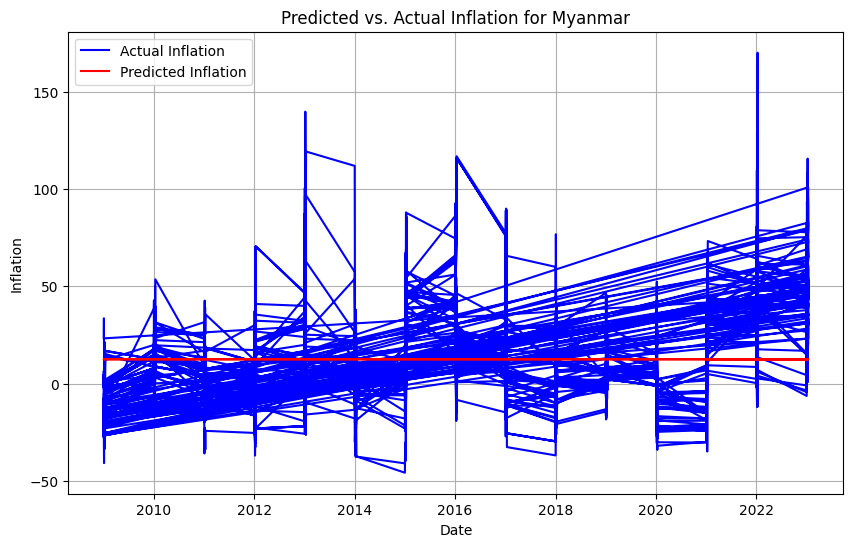

In [75]:
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data, label='Actual Inflation', color='blue')
plt.plot(test_data.index, predictions, label='Predicted Inflation', color='red')
plt.title(f'Predicted vs. Actual Inflation for {country_to_train}')
plt.xlabel('Date')
plt.ylabel('Inflation')
plt.legend()
plt.grid(True)
plt.show()

In [76]:
mse = mean_squared_error(test_data, predictions)
print(f"Mean Squared Error: {mse:.4f}")

Mean Squared Error: 596.5644


In [77]:
forecast_steps = 12  # Number of steps to forecast
forecast = model_fit.forecast(steps=forecast_steps)

C:\Users\jeeva\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\jeeva\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


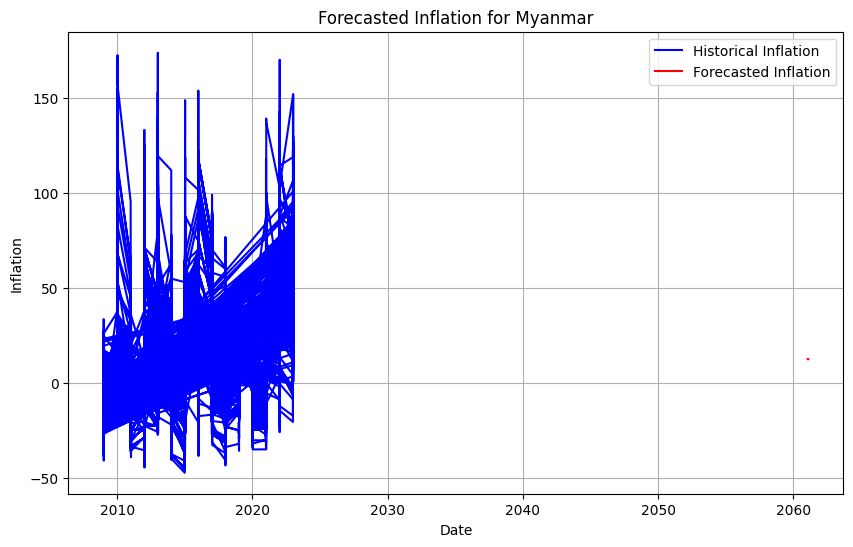

In [78]:
plt.figure(figsize=(10, 6))
plt.plot(country_data.index, country_data, label='Historical Inflation', color='blue')
plt.plot(forecast.index, forecast, label='Forecasted Inflation', color='red')
plt.title(f'Forecasted Inflation for {country_to_train}')
plt.xlabel('Date')
plt.ylabel('Inflation')
plt.legend()
plt.grid(True)
plt.show()